In [1]:
import pandas as pd

In [2]:
import pandas as pd
import json

# Função para converter a string JSON para dicionário
def json_to_dict(x):
    return json.loads(x)

# Lendo o CSV e convertendo a coluna 'song_records' de string JSON para dicionário
df = pd.read_csv('data/xiami/user_music_time.csv', converters={'song_records': json_to_dict})

In [3]:
def sort_song_records_desc(song_records):
    return dict(sorted(song_records.items(), key=lambda item: int(item[0]), reverse=True))

# Aplicar a função para ordenar os IDs na coluna 'song_records' de forma decrescente
df['song_records_order'] = df['song_records'].apply(sort_song_records_desc)

In [4]:
df.loc[0].song_records_order

{'999': {'song_id': '/song/1770995310',
  'player_via': ' \n\t\t电台 \n\t\t',
  'song_name': 'Bling Bling Bling',
  'singer_name': '后海大鲨鱼',
  'play_time': '2015-05-31 19:53',
  'singer_id': '/artist/23396'},
 '998': {'song_id': '/song/1774104938',
  'player_via': ' \n\t\t电台 \n\t\t',
  'song_name': '老狗',
  'singer_name': '万晓利',
  'play_time': '2015-05-31 19:58',
  'singer_id': '/artist/884'},
 '997': {'song_id': '/song/1769303149',
  'player_via': ' \n\t\t电台 \n\t\t',
  'song_name': '骄傲的小毛驴',
  'singer_name': '万晓利',
  'play_time': '2015-05-31 20:06',
  'singer_id': '/artist/884'},
 '996': {'song_id': '/song/179416',
  'player_via': ' \n\t\t电台 \n\t\t',
  'song_name': '采花',
  'singer_name': '二手玫瑰',
  'play_time': '2015-05-31 20:13',
  'singer_id': '/artist/2726'},
 '995': {'song_id': '/song/1773366712',
  'player_via': ' \n\t\t电台 \n\t\t',
  'song_name': 'Waves (Tomorrowland 2014 Anthem) (Original Mix)',
  'singer_name': 'Dimitri Vegas & Like Mike',
  'play_time': '2015-05-31 20:18',
  'singe

In [5]:
import pandas as pd
from datetime import datetime, timedelta

# Função para dividir registros se o intervalo for maior que 30 minutos
def split_song_records_by_time(song_records):
    # Lista para armazenar os conjuntos de registros divididos
    new_records = []
    current_group = {}
    previous_time = None

    # Iterar sobre os registros ordenados
    for song_id, song_info in song_records.items():
        play_time = datetime.strptime(song_info['play_time'], '%Y-%m-%d %H:%M')
        
        # Se existe uma música anterior e o intervalo for maior que 30 minutos, criar um novo grupo
        if previous_time is not None and (play_time - previous_time) > timedelta(minutes=30):
            new_records.append(current_group)
            current_group = {}  # Iniciar um novo grupo
        
        # Adicionar o registro atual ao grupo corrente
        current_group[song_id] = song_info
        previous_time = play_time

    # Adicionar o último grupo à lista
    if current_group:
        new_records.append(current_group)
    
    return new_records

# Aplicar a função a cada linha da coluna 'song_records_order'
new_rows = []
for idx, row in df.iterrows():
    song_records = row['song_records_order']
    split_records = split_song_records_by_time(song_records)
    
    # Criar nova linha para cada conjunto dividido de registros
    for record in split_records:
        new_row = row.copy()  # Copiar os dados da linha original
        new_row['song_records_order'] = record  # Atualizar 'song_records_order' com o conjunto dividido
        new_rows.append(new_row)

# Criar um novo DataFrame com as novas linhas
new_df = pd.DataFrame(new_rows)

# Verificar o resultado
print(new_df.head())


                                  _id      user_id  song_count  \
0  ObjectID(559debb5c1d886225c98ad68)  /u/13776108        1000   
0  ObjectID(559debb5c1d886225c98ad68)  /u/13776108        1000   
0  ObjectID(559debb5c1d886225c98ad68)  /u/13776108        1000   
0  ObjectID(559debb5c1d886225c98ad68)  /u/13776108        1000   
0  ObjectID(559debb5c1d886225c98ad68)  /u/13776108        1000   

                                        song_records  \
0  {'344': {'song_id': '/song/3298073', 'player_v...   
0  {'344': {'song_id': '/song/3298073', 'player_v...   
0  {'344': {'song_id': '/song/3298073', 'player_v...   
0  {'344': {'song_id': '/song/3298073', 'player_v...   
0  {'344': {'song_id': '/song/3298073', 'player_v...   

                                  song_records_order  
0  {'999': {'song_id': '/song/1770995310', 'playe...  
0  {'986': {'song_id': '/song/1773698123', 'playe...  
0  {'967': {'song_id': '/song/1773480897', 'playe...  
0  {'959': {'song_id': '/song/1773481086', 'pl

In [6]:
def calculate_size(dictionary):
    return len(dictionary.keys())

new_df['length'] = new_df['song_records_order'].apply(calculate_size)

In [7]:
new_df

,_id,user_id,song_count,song_records,song_records_order,length
0,ObjectID(559debb5c1d886225c98ad68),/u/13776108,1000,"{'344': {'song_id': '/song/3298073', 'player_v...","{'999': {'song_id': '/song/1770995310', 'playe...",13
0,ObjectID(559debb5c1d886225c98ad68),/u/13776108,1000,"{'344': {'song_id': '/song/3298073', 'player_v...","{'986': {'song_id': '/song/1773698123', 'playe...",19
0,ObjectID(559debb5c1d886225c98ad68),/u/13776108,1000,"{'344': {'song_id': '/song/3298073', 'player_v...","{'967': {'song_id': '/song/1773480897', 'playe...",8
0,ObjectID(559debb5c1d886225c98ad68),/u/13776108,1000,"{'344': {'song_id': '/song/3298073', 'player_v...","{'959': {'song_id': '/song/1773481086', 'playe...",8
0,ObjectID(559debb5c1d886225c98ad68),/u/13776108,1000,"{'344': {'song_id': '/song/3298073', 'player_v...","{'951': {'song_id': '/song/1773480811', 'playe...",7
...,...,...,...,...,...,...
4283,ObjectID(559debe0c1d886225c9ecc7b),/u/10610698,1000,"{'344': {'song_id': '/song/1769576471', 'playe...","{'452': {'song_id': '/song/3007997', 'player_v...",63
4283,ObjectID(559debe0c1d886225c9ecc7b),/u/10610698,1000,"{'344': {'song_id': '/song/1769576471', 'playe...","{'389': {'song_id': '/song/1668571', 'player_v...",120
4283,ObjectID(559debe0c1d886225c9ecc7b),/u/10610698,1000,"{'344': {'song_id': '/song/1769576471', 'playe...","{'269': {'song_id': '/song/1618769', 'player_v...",106
4283,ObjectID(559debe0c1d886225c9ecc7b),/u/10610698,1000,"{'344': {'song_id': '/song/1769576471', 'playe...","{'163': {'song_id': '/song/394996', 'player_vi...",107


In [8]:
def extrair_song_ids(ordered_dict):
    return [valor['song_id'] for valor in ordered_dict.values()]

# Aplique a função à coluna 'song_records_order' do dataframe
new_df['song_ids_order'] = new_df['song_records_order'].apply(extrair_song_ids)

In [9]:
cleaned_dataframe = new_df[['song_ids_order','length']].reset_index(drop=True)

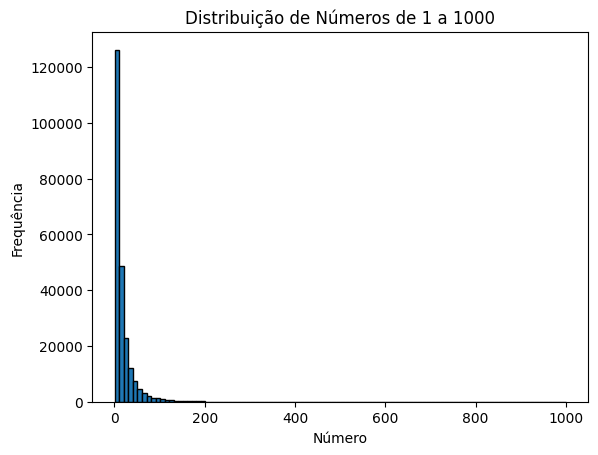

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.hist(cleaned_dataframe['length'], bins=100, edgecolor='black')
plt.title('Distribuição de Números de 1 a 1000')
plt.xlabel('Número')
plt.ylabel('Frequência')

# Display the plot
plt.show()

In [11]:
todas_as_strings = [string for lista in cleaned_dataframe['song_ids_order'] for string in lista]

In [12]:
serie_strings = pd.Series(todas_as_strings)

In [13]:
contagens = serie_strings.value_counts()

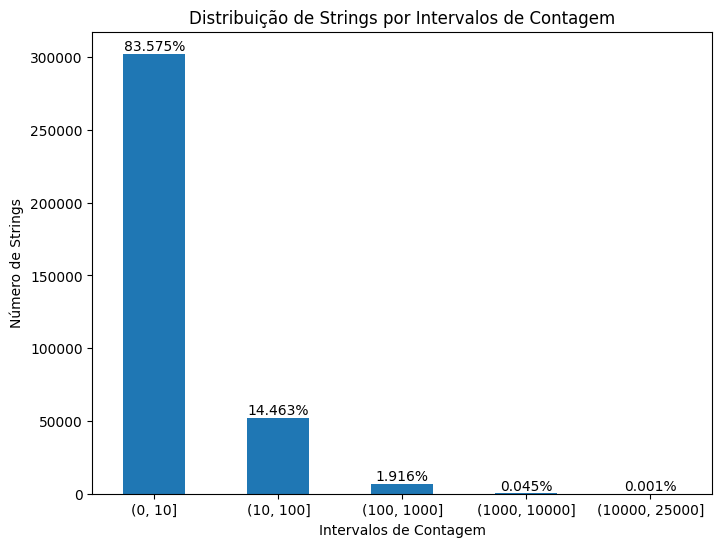

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir os bins (ajuste conforme necessário)
bins = [0, 10, 100, 1000, 10000, 25000]

# Usar pd.cut para colocar as contagens nos bins
contagens_binned = pd.cut(contagens, bins=bins)

# Contar quantos valores estão em cada bin
contagem_por_bin = contagens_binned.value_counts(sort=False)

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
ax = contagem_por_bin.plot(kind='bar')

# Adicionar título e rótulos
plt.title('Distribuição de Strings por Intervalos de Contagem')
plt.xlabel('Intervalos de Contagem')
plt.ylabel('Número de Strings')

# Calcular e adicionar as porcentagens em cima das barras
total = contagem_por_bin.sum()
for p in ax.patches:
    altura = p.get_height()
    porcentagem = f'{(altura / total) * 100:.3f}%'
    ax.annotate(porcentagem, (p.get_x() + p.get_width() / 2, altura), 
                ha='center', va='bottom', fontsize=10)

# Exibir o gráfico
plt.xticks(rotation=0)
plt.show()

In [1]:
cleaned_dataframe.to_csv('data/xiami/dataframe.csv', index=False)

NameError: name 'cleaned_dataframe' is not defined

In [1]:
import pandas as pd
import ast

In [2]:
dataframe = pd.read_csv('data/xiami/dataframe.csv')

In [3]:
dataframe['song_ids_order'] = dataframe['song_ids_order'].apply(ast.literal_eval)

In [4]:
# min 2 itens para input
# 1 item para recomendacao
# 1 item para avaliacao

dataframe = dataframe[dataframe['length'] > 3]

In [5]:
dataframe['last_item'] = dataframe['song_ids_order'].apply(lambda x: x.pop() if len(x) > 0 else None)

In [6]:
all_songs = set([item for sublist in dataframe['song_ids_order'] for item in sublist])

In [7]:
dataframe = dataframe[dataframe['last_item'].isin(all_songs)]

In [9]:
dataframe.iloc[0].song_ids_order

['/song/1770995310',
 '/song/1774104938',
 '/song/1769303149',
 '/song/179416',
 '/song/1773366712',
 '/song/1770532704',
 '/song/3502799',
 '/song/1771791408',
 '/song/1239198',
 '/song/2645220',
 '/song/1242485',
 '/song/1773698128']